# Financial Data Analysis of Microsoft, Tesla, and Apple  

## Project Overview  

This project focuses on analyzing financial data from **Microsoft, Tesla, and Apple** based on their **last three fiscal years' 10-K filings**. The goal is to extract key financial figures and analyze trends that could inform the development of an **AI-powered financial chatbot**.  

## Step 1:   

### **1. Data Extraction**  
- Retrieved **10-K reports** from the **SEC EDGAR database** for Microsoft, Tesla, and Apple.  
- Extracted key financial metrics for **2022, 2023, and 2024**, including:  
  - **Total Revenue**  
  - **Net Income**  
  - **Total Assets**  
  - **Total Liabilities**  
  - **Cash Flow from Operating Activities**  

---  


## Step 2:  

### **2. Load and explore data**  

In [7]:
# Import pandas
import pandas as pd

- Load the **CSV file** into a **Pandas DataFrame** for analysis.
- The CSV file uses semicolons (;) as the delimiter instead of the default comma (,). To correctly import it into Pandas, you need to specify the delimiter when reading the file.

In [11]:
# Load the CSV file with semicolon as the delimiter
df = pd.read_csv("10K_Financial_Data.csv", delimiter=";")

# Display the first few rows to check if the data is correctly loaded
df

,Company,Fiscal Year,Total Revenue ($M),Net Income ($M),Total Assets ($M),Total Liabilities ($M),Cash Flow from Operating Activities ($M)
0,Microsoft,2024,"245,122","88,136","512,163","243,686","118,548"
1,Microsoft,2023,"211,915","72,361","411,976","205,753","87,582"
2,Microsoft,2022,"198,270","72,738","364,840","198,298","89,035"
3,Tesla,2024,"97,690","7,153","122,070","48,390","14,923"
4,Tesla,2023,"96,773","14,974","106,618","43,009","13,256"
5,Tesla,2022,"81,462","12,587","82,338","36,440","14,724"
6,Apple,2024,"391,035","93,736","364,980","308,030","118,254"
7,Apple,2023,"383,285","96,995","352,583","290,437","110,543"
8,Apple,2022,"394,328","99,803","352,755","302,083","122,151"


In [15]:
# Overview of the columns Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Company                                   9 non-null      object
 1   Fiscal Year                               9 non-null      int64 
 2   Total Revenue ($M)                        9 non-null      object
 3   Net Income ($M)                           9 non-null      object
 4   Total Assets ($M)                         9 non-null      object
 5   Total Liabilities ($M)                    9 non-null      object
 6   Cash Flow from Operating Activities ($M)  9 non-null      object
dtypes: int64(1), object(6)
memory usage: 632.0+ bytes


### **3. Analyzing trends with pandas:**  
- We use pandas to calculate **year-over-year changes** for each financial metric.
- We can do this by creating new columns that represent the percentage change from one year to the next.

#### 3.1 Ensure Columns Are Numeric
Since our financial data contains commas (e.g., "243,686"), we need to remove them and convert to float before performing calculations.


In [17]:
# Convert financial columns to numeric by removing commas
cols_to_convert = ["Total Revenue ($M)", "Net Income ($M)", "Total Assets ($M)", "Total Liabilities ($M)", "Cash Flow from Operating Activities ($M)"]
df[cols_to_convert] = df[cols_to_convert].replace(",", "", regex=True).astype(float)

df

,Company,Fiscal Year,Total Revenue ($M),Net Income ($M),Total Assets ($M),Total Liabilities ($M),Cash Flow from Operating Activities ($M)
0,Microsoft,2024,245122.0,88136.0,512163.0,243686.0,118548.0
1,Microsoft,2023,211915.0,72361.0,411976.0,205753.0,87582.0
2,Microsoft,2022,198270.0,72738.0,364840.0,198298.0,89035.0
3,Tesla,2024,97690.0,7153.0,122070.0,48390.0,14923.0
4,Tesla,2023,96773.0,14974.0,106618.0,43009.0,13256.0
5,Tesla,2022,81462.0,12587.0,82338.0,36440.0,14724.0
6,Apple,2024,391035.0,93736.0,364980.0,308030.0,118254.0
7,Apple,2023,383285.0,96995.0,352583.0,290437.0,110543.0
8,Apple,2022,394328.0,99803.0,352755.0,302083.0,122151.0


#### 3.2 Calculate Year-over-Year Percentage Changes
- we compute the percentage growth for each financial metric using **.pct_change()**

In [19]:
# Sort by Company and Fiscal Year to ensure correct calculations
df = df.sort_values(by=["Company", "Fiscal Year"])
df

,Company,Fiscal Year,Total Revenue ($M),Net Income ($M),Total Assets ($M),Total Liabilities ($M),Cash Flow from Operating Activities ($M)
8,Apple,2022,394328.0,99803.0,352755.0,302083.0,122151.0
7,Apple,2023,383285.0,96995.0,352583.0,290437.0,110543.0
6,Apple,2024,391035.0,93736.0,364980.0,308030.0,118254.0
2,Microsoft,2022,198270.0,72738.0,364840.0,198298.0,89035.0
1,Microsoft,2023,211915.0,72361.0,411976.0,205753.0,87582.0
0,Microsoft,2024,245122.0,88136.0,512163.0,243686.0,118548.0
5,Tesla,2022,81462.0,12587.0,82338.0,36440.0,14724.0
4,Tesla,2023,96773.0,14974.0,106618.0,43009.0,13256.0
3,Tesla,2024,97690.0,7153.0,122070.0,48390.0,14923.0


In [22]:
# Calculate percentage change for each metric
df["Revenue Growth (%)"] = df.groupby("Company")["Total Revenue ($M)"].pct_change() * 100
df["Net Income Growth (%)"] = df.groupby("Company")["Net Income ($M)"].pct_change() * 100
df["Assets Growth (%)"] = df.groupby("Company")["Total Assets ($M)"].pct_change() * 100
df["Liabilities Growth (%)"] = df.groupby("Company")["Total Liabilities ($M)"].pct_change() * 100
df["Cash Flow Growth (%)"] = df.groupby("Company")["Cash Flow from Operating Activities ($M)"].pct_change() * 100

df

,Company,Fiscal Year,Total Revenue ($M),Net Income ($M),Total Assets ($M),Total Liabilities ($M),Cash Flow from Operating Activities ($M),Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
8,Apple,2022,394328.0,99803.0,352755.0,302083.0,122151.0,NaN,NaN,NaN,NaN,NaN
7,Apple,2023,383285.0,96995.0,352583.0,290437.0,110543.0,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992
6,Apple,2024,391035.0,93736.0,364980.0,308030.0,118254.0,2.021994,-3.359967,3.516052,6.057424,6.975566
2,Microsoft,2022,198270.0,72738.0,364840.0,198298.0,89035.0,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2023,211915.0,72361.0,411976.0,205753.0,87582.0,6.882030,-0.518299,12.919636,3.759493,-1.631942
0,Microsoft,2024,245122.0,88136.0,512163.0,243686.0,118548.0,15.669962,21.800417,24.318650,18.436183,35.356580
5,Tesla,2022,81462.0,12587.0,82338.0,36440.0,14724.0,NaN,NaN,NaN,NaN,NaN
4,Tesla,2023,96773.0,14974.0,106618.0,43009.0,13256.0,18.795267,18.964010,29.488207,18.026894,-9.970117
3,Tesla,2024,97690.0,7153.0,122070.0,48390.0,14923.0,0.947578,-52.230533,14.492862,12.511335,12.575438


#### Handle Missing Values
- Since **pct_change()** calculates the percentage difference from the previous year, the first year for each company will have NaN values
- We can fill NaNs with 0

In [26]:
df.fillna(0, inplace=True)

# Reset the index to get sequential indices
df.reset_index(drop=True, inplace=True)

df

,Company,Fiscal Year,Total Revenue ($M),Net Income ($M),Total Assets ($M),Total Liabilities ($M),Cash Flow from Operating Activities ($M),Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
0,Apple,2022,394328.0,99803.0,352755.0,302083.0,122151.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,Apple,2023,383285.0,96995.0,352583.0,290437.0,110543.0,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992
2,Apple,2024,391035.0,93736.0,364980.0,308030.0,118254.0,2.021994,-3.359967,3.516052,6.057424,6.975566
3,Microsoft,2022,198270.0,72738.0,364840.0,198298.0,89035.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,Microsoft,2023,211915.0,72361.0,411976.0,205753.0,87582.0,6.882030,-0.518299,12.919636,3.759493,-1.631942
5,Microsoft,2024,245122.0,88136.0,512163.0,243686.0,118548.0,15.669962,21.800417,24.318650,18.436183,35.356580
6,Tesla,2022,81462.0,12587.0,82338.0,36440.0,14724.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,Tesla,2023,96773.0,14974.0,106618.0,43009.0,13256.0,18.795267,18.964010,29.488207,18.026894,-9.970117
8,Tesla,2024,97690.0,7153.0,122070.0,48390.0,14923.0,0.947578,-52.230533,14.492862,12.511335,12.575438


### **4. Summarizing findings:**

#### Plot revenue growth for each company


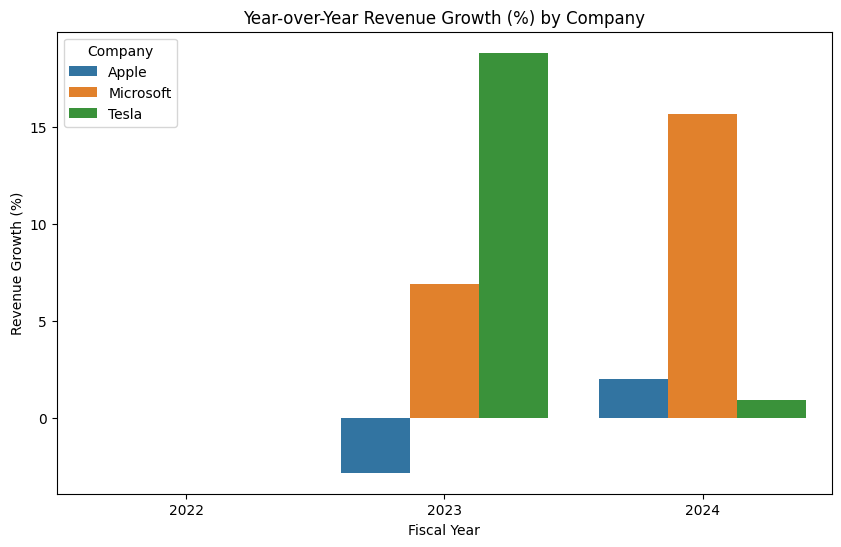

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot revenue growth for each company
plt.figure(figsize=(10, 6))
sns.barplot(x='Fiscal Year', y='Revenue Growth (%)', hue='Company', data=df)
plt.title('Year-over-Year Revenue Growth (%) by Company')
plt.xlabel('Fiscal Year')
plt.ylabel('Revenue Growth (%)')
plt.show()

#### Plot net income growth for each company

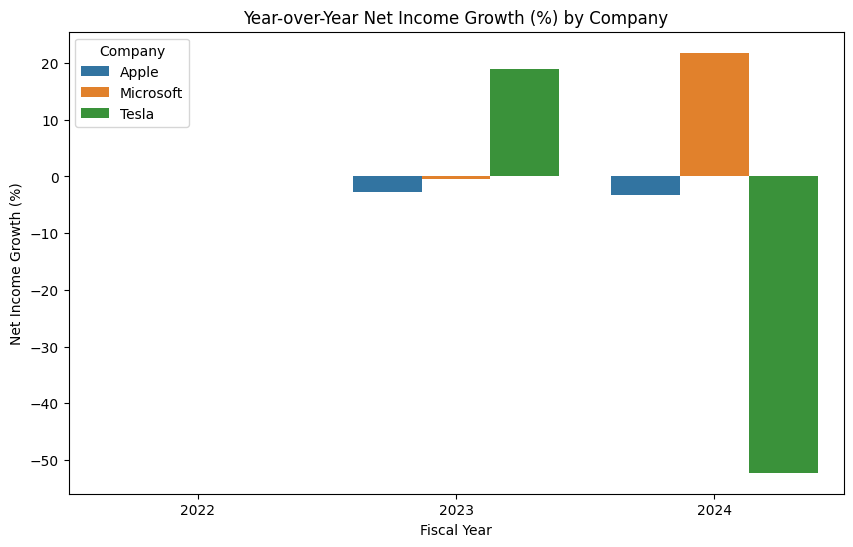

In [29]:
# Plot net income growth for each company
plt.figure(figsize=(10, 6))
sns.barplot(x='Fiscal Year', y='Net Income Growth (%)', hue='Company', data=df)
plt.title('Year-over-Year Net Income Growth (%) by Company')
plt.xlabel('Fiscal Year')
plt.ylabel('Net Income Growth (%)')
plt.show()

#### Plot assets growth for each company

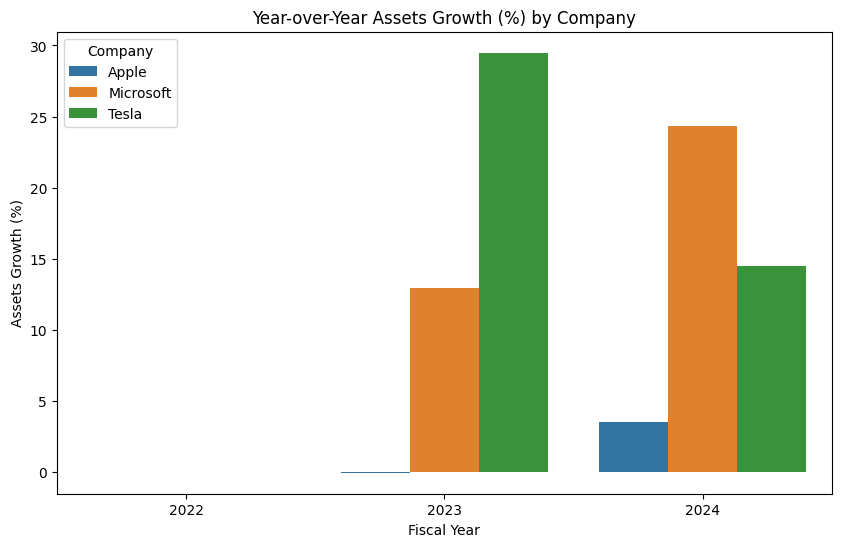

In [30]:
# Plot assets growth for each company
plt.figure(figsize=(10, 6))
sns.barplot(x='Fiscal Year', y='Assets Growth (%)', hue='Company', data=df)
plt.title('Year-over-Year Assets Growth (%) by Company')
plt.xlabel('Fiscal Year')
plt.ylabel('Assets Growth (%)')
plt.show()

#### Plot liabilities growth for each company

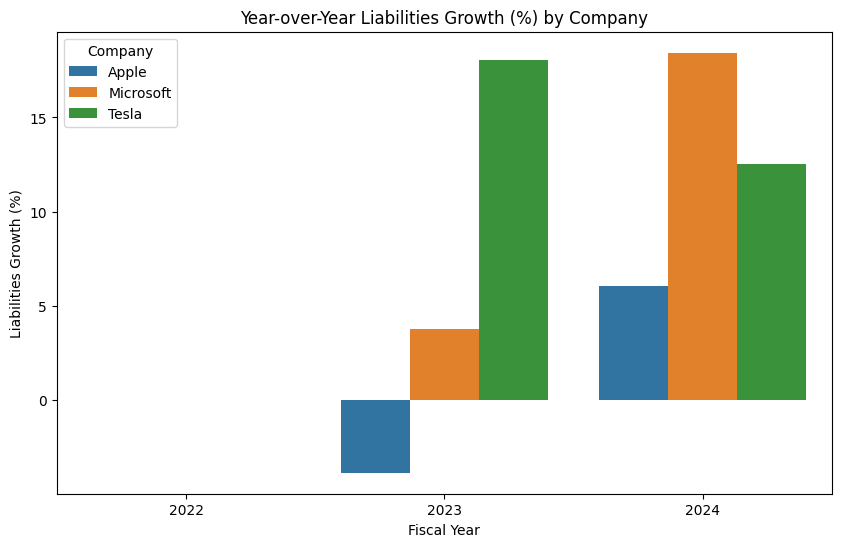

In [31]:
# Plot liabilities growth for each company
plt.figure(figsize=(10, 6))
sns.barplot(x='Fiscal Year', y='Liabilities Growth (%)', hue='Company', data=df)
plt.title('Year-over-Year Liabilities Growth (%) by Company')
plt.xlabel('Fiscal Year')
plt.ylabel('Liabilities Growth (%)')
plt.show()

#### Plot cash flow growth for each company

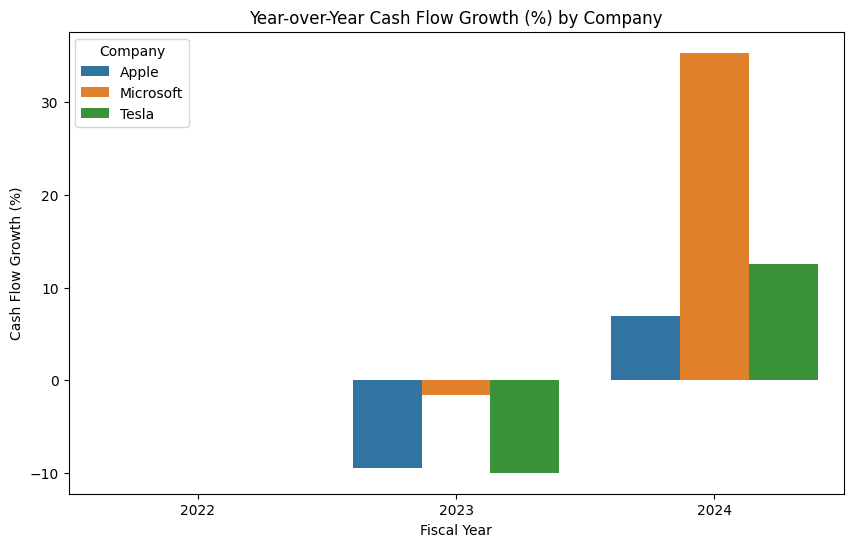

In [32]:
# Plot cash flow growth for each company
plt.figure(figsize=(10, 6))
sns.barplot(x='Fiscal Year', y='Cash Flow Growth (%)', hue='Company', data=df)
plt.title('Year-over-Year Cash Flow Growth (%) by Company')
plt.xlabel('Fiscal Year')
plt.ylabel('Cash Flow Growth (%)')
plt.show()

#### Average growth for each metric across the three companies

In [34]:
summary = {
    "Microsoft": {
        "Revenue Growth (%)": df[df['Company'] == 'Microsoft']['Revenue Growth (%)'].mean(),
        "Net Income Growth (%)": df[df['Company'] == 'Microsoft']['Net Income Growth (%)'].mean(),
        "Assets Growth (%)": df[df['Company'] == 'Microsoft']['Assets Growth (%)'].mean(),
        "Liabilities Growth (%)": df[df['Company'] == 'Microsoft']['Liabilities Growth (%)'].mean(),
        "Cash Flow Growth (%)": df[df['Company'] == 'Microsoft']['Cash Flow Growth (%)'].mean(),
    },
    "Tesla": {
        "Revenue Growth (%)": df[df['Company'] == 'Tesla']['Revenue Growth (%)'].mean(),
        "Net Income Growth (%)": df[df['Company'] == 'Tesla']['Net Income Growth (%)'].mean(),
        "Assets Growth (%)": df[df['Company'] == 'Tesla']['Assets Growth (%)'].mean(),
        "Liabilities Growth (%)": df[df['Company'] == 'Tesla']['Liabilities Growth (%)'].mean(),
        "Cash Flow Growth (%)": df[df['Company'] == 'Tesla']['Cash Flow Growth (%)'].mean(),
    },
    "Apple": {
        "Revenue Growth (%)": df[df['Company'] == 'Apple']['Revenue Growth (%)'].mean(),
        "Net Income Growth (%)": df[df['Company'] == 'Apple']['Net Income Growth (%)'].mean(),
        "Assets Growth (%)": df[df['Company'] == 'Apple']['Assets Growth (%)'].mean(),
        "Liabilities Growth (%)": df[df['Company'] == 'Apple']['Liabilities Growth (%)'].mean(),
        "Cash Flow Growth (%)": df[df['Company'] == 'Apple']['Cash Flow Growth (%)'].mean(),
    }
}

# Display the summary
summary_df = pd.DataFrame(summary)
summary_df = summary_df.T  # Transpose for easier reading
summary_df

,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
Microsoft,7.517331,7.094040,12.412762,7.398559,11.241546
Tesla,6.580948,-11.088841,14.660357,10.179409,0.868440
Apple,-0.259489,-2.057837,1.155764,0.734064,-0.842475


### Summary of Key Financial Findings

1. **Revenue Growth**:
   - **Microsoft** has the highest revenue growth at **7.52%**.
   - **Tesla** shows a steady growth rate of **6.58%**.
   - **Apple** experienced a slight decline in revenue growth at **-0.26%**, indicating slower revenue growth compared to the other two companies.

2. **Net Income Growth**:
   - **Microsoft** shows a positive growth of **7.09%**, indicating strong profitability improvement.
   - **Tesla** had a negative net income growth of **-11.09%**, reflecting a decrease in profitability.
   - **Apple** also saw a slight decrease in net income growth at **-2.06%**.

3. **Assets Growth**:
   - **Tesla** leads with the highest asset growth at **14.66%**, demonstrating significant expansion in its total assets.
   - **Microsoft** follows with a strong growth of **12.41%**.
   - **Apple** showed the lowest asset growth at **1.16%**, indicating slower asset accumulation.

4. **Liabilities Growth**:
   - **Tesla** has the highest liabilities growth at **10.18%**, indicating a substantial increase in liabilities.
   - **Microsoft** had a moderate liabilities growth of **7.40%**.
   - **Apple** had the lowest liabilities growth at **0.73%**.

5. **Cash Flow Growth**:
   - **Microsoft** leads with the strongest cash flow growth at **11.24%**.
   - **Tesla** has a modest growth of **0.87%**, reflecting slower cash flow growth.
   - **Apple** shows a decrease in cash flow growth at **-0.84%**.

### **Conclusion**:
- **Microsoft** shows consistent and positive growth in most financial metrics, particularly in **revenue**, **net income**, and **cash flow**.
- **Tesla** displays strong asset growth but faces challenges with profitability as seen in the negative **net income growth**.
- **Apple** shows slower growth across almost all metrics, with a particularly notable decline in **revenue** and **cash flow**.

These insights suggest that Microsoft has the strongest financial performance among the three companies in recent years, while Tesla is experiencing rapid asset growth but challenges in profitability. Apple is facing slower growth, especially in revenue and cash flow.
